Explicar objetivo del modelo, configuración de 2 técnicas y resultado obtenido. Indicar qué conocimiento nuevo se obtuvo. Realizar tanto el aprendizaje como el despliegue.

In [235]:
#Importamos librerías básicas
import pandas as pd # manipulacion dataframes
import numpy as np  # matrices y vectores
import matplotlib.pyplot as plt #gráfica

In [236]:
#Cargamos los datos
data = pd.read_csv("csvDatosProcesados.csv")
data.head()

,id,DEPARTAMENTO,TASA_MATRICULACIoN_5_16,COBERTURA_NETA_MEDIA,TAMANO_PROMEDIO_DE_GRUPO,DESERCIoN_MEDIA,APROBACIoN_MEDIA
0,1,Antioquia,108.73,59.7,31.55,2.95,96.88
1,2,Antioquia,97.81,36.3,21.02,8.49,90.33
2,3,Antioquia,88.61,35.3,19.15,2.99,89.55
3,4,Antioquia,118.52,48.5,32.14,8.04,83.93
4,5,Antioquia,78.65,38.9,25.05,3.21,89.34


In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1001 non-null   int64  
 1   DEPARTAMENTO              1001 non-null   object 
 2   TASA_MATRICULACIoN_5_16   1001 non-null   float64
 3   COBERTURA_NETA_MEDIA      1001 non-null   float64
 4   TAMANO_PROMEDIO_DE_GRUPO  1001 non-null   float64
 5   DESERCIoN_MEDIA           1001 non-null   float64
 6   APROBACIoN_MEDIA          1001 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 54.9+ KB


In [238]:
data = data.drop("id" , axis=1)
data = data.drop("DEPARTAMENTO" , axis=1)

In [239]:
#Sklearn sólo analiza variables numéricas
#data = pd.get_dummies(data, columns=['DEPARTAMENTO'], drop_first=False)
#data.head()

In [240]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TASA_MATRICULACIoN_5_16   1001 non-null   float64
 1   COBERTURA_NETA_MEDIA      1001 non-null   float64
 2   TAMANO_PROMEDIO_DE_GRUPO  1001 non-null   float64
 3   DESERCIoN_MEDIA           1001 non-null   float64
 4   APROBACIoN_MEDIA          1001 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB


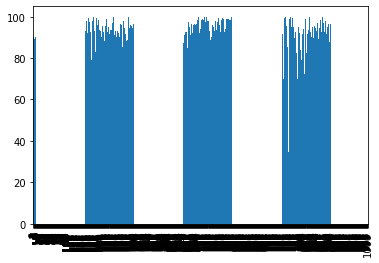

In [241]:
data['APROBACIoN_MEDIA'].plot(kind='bar')

## División 70 - 30

In [242]:
#Normalizacion las variables numéricas (las dummies no se normalizan)
from sklearn.preprocessing import MinMaxScaler
 
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(data[['TASA_MATRICULACIoN_5_16','COBERTURA_NETA_MEDIA','TAMANO_PROMEDIO_DE_GRUPO','DESERCIoN_MEDIA']]) #Ajuste de los parametros: max - min
 
#Se aplica la normalización a 70%  y 30%
X_train[['TASA_MATRICULACIoN_5_16','COBERTURA_NETA_MEDIA','TAMANO_PROMEDIO_DE_GRUPO','DESERCIoN_MEDIA']]= min_max_scaler.transform(X_train[['TASA_MATRICULACIoN_5_16','COBERTURA_NETA_MEDIA','TAMANO_PROMEDIO_DE_GRUPO','DESERCIoN_MEDIA']]) 
X_test[['TASA_MATRICULACIoN_5_16','COBERTURA_NETA_MEDIA','TAMANO_PROMEDIO_DE_GRUPO','DESERCIoN_MEDIA']]= min_max_scaler.transform(X_test[['TASA_MATRICULACIoN_5_16','COBERTURA_NETA_MEDIA','TAMANO_PROMEDIO_DE_GRUPO','DESERCIoN_MEDIA']]) 
X_train.head()

,TASA_MATRICULACIoN_5_16,COBERTURA_NETA_MEDIA,TAMANO_PROMEDIO_DE_GRUPO,DESERCIoN_MEDIA
838,0.522118,0.425414,0.427951,0.353976
893,0.404127,0.278453,0.348540,0.182266
279,0.348856,0.543646,0.252715,0.457424
280,0.399282,0.299448,0.434709,0.730471
997,0.708569,0.361326,0.460536,0.220971


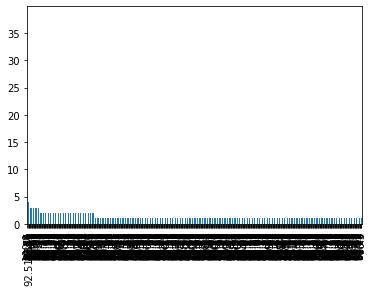

In [243]:
#División 70-30
from sklearn.model_selection import train_test_split
X = data.drop("APROBACIoN_MEDIA", axis = 1) # Variables predictoras
Y = data['APROBACIoN_MEDIA'] #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
Y_train.value_counts().plot(kind='bar')# Objetivo del 70%

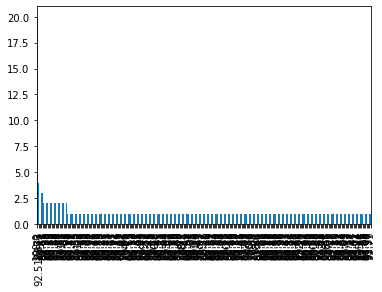

In [244]:
Y_test.value_counts().plot(kind='bar')# Objetivo del 30%

## KNN

In [245]:
from sklearn import neighbors 
model_Knn = neighbors.KNeighborsRegressor(n_neighbors=3, metric='minkowski')
model_Knn.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=3)

In [246]:
#Evaluación sobre el conjunto de prueba

from sklearn import metrics
Y_pred = model_Knn.predict(X_test)
mae= metrics.mean_absolute_error(Y_test,Y_pred)

print(mae)

4.8231190210409745


## ARBOLES

In [253]:
X_train

,TASA_MATRICULACIoN_5_16,COBERTURA_NETA_MEDIA,TAMANO_PROMEDIO_DE_GRUPO,DESERCIoN_MEDIA
856,74.52,25.3,18.29,5.62000
984,96.07,43.5,22.62,4.99000
477,106.39,57.5,12.31,1.88000
765,77.26,10.6,16.05,4.04826
64,115.85,48.2,32.85,4.04826
...,...,...,...,...
472,96.04,56.8,13.38,3.64000
72,63.00,11.1,22.47,4.65000
329,85.71,38.4,19.57,2.23000
221,71.07,40.9,22.26,2.46000


In [247]:
from sklearn import tree
model_Tree = tree.DecisionTreeRegressor(criterion='mse', min_samples_leaf=2, max_depth=10)
model_Tree.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mse', max_depth=10, min_samples_leaf=2)

[Text(0.4853259248210024, 0.9545454545454546, 'DESERCIoN_MEDIA <= 3.095\nmse = 50.369\nsamples = 700\nvalue = 92.46'),
 Text(0.17996718377088305, 0.8636363636363636, 'DESERCIoN_MEDIA <= 1.645\nmse = 16.831\nsamples = 265\nvalue = 95.332'),
 Text(0.0994928400954654, 0.7727272727272727, 'TAMANO_PROMEDIO_DE_GRUPO <= 22.26\nmse = 11.592\nsamples = 111\nvalue = 96.657'),
 Text(0.04385441527446301, 0.6818181818181818, 'DESERCIoN_MEDIA <= 0.435\nmse = 3.282\nsamples = 70\nvalue = 97.452'),
 Text(0.00954653937947494, 0.5909090909090909, 'TAMANO_PROMEDIO_DE_GRUPO <= 17.715\nmse = 1.794\nsamples = 8\nvalue = 98.841'),
 Text(0.00477326968973747, 0.5, 'mse = 3.69\nsamples = 3\nvalue = 98.07'),
 Text(0.014319809069212411, 0.5, 'DESERCIoN_MEDIA <= 0.39\nmse = 0.085\nsamples = 5\nvalue = 99.304'),
 Text(0.00954653937947494, 0.4090909090909091, 'mse = 0.048\nsamples = 3\nvalue = 99.11'),
 Text(0.01909307875894988, 0.4090909090909091, 'mse = 0.0\nsamples = 2\nvalue = 99.595'),
 Text(0.07816229116945107

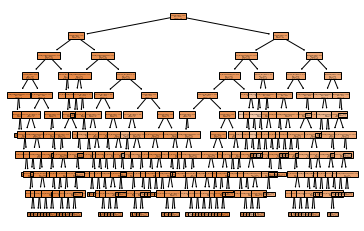

In [248]:
from sklearn.tree import plot_tree
nombres_variables=X_train.columns.values
plot_tree(model_Tree, feature_names=nombres_variables, filled=True)

In [249]:
X_train.columns.values

array(['TASA_MATRICULACIoN_5_16', 'COBERTURA_NETA_MEDIA',
       'TAMANO_PROMEDIO_DE_GRUPO', 'DESERCIoN_MEDIA'], dtype=object)

In [250]:
from sklearn import metrics
Y_pred = model_Tree.predict(X_test)
mae= metrics.mean_absolute_error(Y_test,Y_pred)
print(mae)

4.59951343713345


## DESPLIEGUE

In [254]:
import pickle
filename = 'modelo.pkl'
variables= X.columns._values
pickle.dump([modelTree,modelKnn,variables,min_max_scaler], open(filename, 'wb'))

In [252]:
data.head()

,TASA_MATRICULACIoN_5_16,COBERTURA_NETA_MEDIA,TAMANO_PROMEDIO_DE_GRUPO,DESERCIoN_MEDIA,APROBACIoN_MEDIA
0,108.73,59.7,31.55,2.95,96.88
1,97.81,36.3,21.02,8.49,90.33
2,88.61,35.3,19.15,2.99,89.55
3,118.52,48.5,32.14,8.04,83.93
4,78.65,38.9,25.05,3.21,89.34
